# Análise de Recursos Humanos - People Analytics

Este projeto utiliza dados disponibilizados no [Kaggle](https://www.kaggle.com/datasets/2e87aca9cfb969c5d6e89dbba2aba6d7b5a3cb769e43608a247859512197917d) sobre "People Analytics aplicados a RH e CRM". O objetivo é analisar informações de funcionários, avaliações sobre o ambiente de trabalho e outros dados relevantes para identificar perfis de colaboradores propensos a deixar a empresa.

Será empregada a metodologia CRISP-DM, e um modelo preditivo será desenvolvido para identificar os grupos mais propensos ao desligamento, oferecendo insights e sugerindo soluções para os problemas identificados. O foco é reduzir a saída de colaboradores e aprimorar a retenção de talentos.

## Contexto do problema

A _RetaiX_, com uma equipe de aproximadamente **4000 funcionários**, enfrenta uma alta **rotatividade anual de cerca de 15%**. Essa taxa de saída, seja por vontade própria ou demissão, é considerada prejudicial pela gestão, devido a:

- Impacto negativo nos prazos, afetando a reputação da empresa perante consumidores e parceiros;
- Necessidade de manter um departamento significativo para recrutamento;
- Requerimento de treinamento e período de adaptação para os novos funcionários.

## Demanda do negócio

- Analisar os dados para identificar padrões de comportamento dos funcionários (obter personas);
- Identificar as variáveis que mais influenciam na alta rotatividade dos funcionários;
- Calcular a probabilidade de um funcionário deixar a empresa e identificar as variáveis que mais contribuem para esse aumento;
- Elaborar um relatório com as conclusões para que o gestor de RH possa tomar medidas para reduzir a rotatividade.

## Compreensão dos dados

Os dados disponíveis incluem quatro arquivos em formato _CSV_ e um arquivo _Excel_ com o dicionário de dados. Para o projeto de análise de recursos humanos (People Analytics), serão utilizados três arquivos que refletem os dados dos funcionários, suas percepções sobre o trabalho e seu impacto em suas vidas, além da avaliação de gestores. Esses dados foram extraídos do dataset publicado no [Kaggle](https://www.kaggle.com/datasets/2e87aca9cfb969c5d6e89dbba2aba6d7b5a3cb769e43608a247859512197917d) sob o título "People Analytics aplicados a RH e CRM".

## Dicionário de dados

| Variáveis | Descrição | Domínios |
|------------------------------|------------------------------|------------------------------|
| Idade                        | Idade do funcionário | |
| Rotatividade                 | Se o funcionário deixou a empresa no ano anterior ou não | |
| ViagensDeNegocio             | Com que frequência os funcionários viajaram a negócios no último ano | |
| Departamento                 | Departamento na empresa | |
| DistanciaDeCasa              | Distância de casa em quilômetros | |
| Educacao                     | Nível de Educação | 1 'Abaixo do Ensino Superior'<br>2 'Ensino Superior Incompleto'<br>3 'Bacharel'<br>4 'Mestre'<br>5 'Doutor' |
| CampoDeEducacao              | Campo de educação | |
| ContagemDeEmpregados         | Contagem de funcionários | |
| IDDoEmpregado                | Número/ID do funcionário | |
| SatisfacaoComAmbiente        | Nível de Satisfação com o Ambiente de Trabalho | 1 'Baixo'<br>2 'Médio'<br>3 'Alto'<br>4 'Muito Alto' |
| Genero                       | Gênero do funcionário | |
| EnvolvimentoNoTrabalho       | Nível de Envolvimento no Trabalho | 1 'Baixo'<br>2 'Médio'<br>3 'Alto'<br>4 'Muito Alto' |
|                   | Nível do cargo na empresa em uma escala de 1 a 5 | |
|                   | Nome da função na empresa | |
| SatisfacaoNoTrabalho         | Nível de Satisfação no Trabalho | 1 'Baixo'<br>2 'Médio'<br>3 'Alto'<br>4 'Muito Alto' |
| EstadoCivil                  | Estado civil do funcionário | |
| RendaMensal                  | Renda mensal em rúpias por mês | |
| NumeroDeEmpresas             | Número total de empresas pelas quais o funcionário passou | |
| MaiorDe18                    | Se o funcionário é maior de 18 anos ou não | |
| AumentoPercentualSalario     | Percentual de aumento salarial no último ano | |
| AvaliacaoDeDesempenho        | Avaliação de desempenho do último ano | 1 'Baixo'<br>2 'Bom'<br>3 'Excelente'<br>4 'Excepcional' |
| HorasPadrao                  | Horas padrão de trabalho para o funcionário | |
| NivelDeOpcaoDeCompraDeAcoes  | Nível de opção de ações do funcionário | |
| TotalDeAnosTrabalhados       | Número total de anos que o funcionário trabalhou até agora | |
| TreinamentosNoUltimoAno      | Número de vezes que treinamentos foram realizados para este funcionário no último ano | |
| EquilibrioTrabalhoVida       | Nível de equilíbrio entre trabalho e vida pessoal   | 1 'Ruim'<br>2 'Bom'<br>3 'Melhor'<br>4 'Ótimo' |
| AnosNaEmpresa                | Número total de anos que o funcionário passou na empresa | |
| AnosDesdeUltimaPromocao      | Número de anos desde a última promoção | |
| AnosComAtualGestor           | Número de anos sob o gerente atual | |

## Sumário

1. **Importação de bibliotecas**
2. **Carregamento das bases**
3. **Análise dos dataframes**
4. **Análise dos dados**
   - 4.1. Limpeza e pré-processamento dos dados
     - 4.1.1. Análise de registros duplicados
     - 4.1.2. Análise de valores nulos
   - 4.2. Análise das medidas estatísticas dos dados
   - 4.3. Análise exploratória dos dados
     - 4.3.1. Taxa de rotatividade
     - 4.3.2. Distribuição de idade
     - 4.3.3. Taxa de rotatividade por faixa etária
     - 4.3.4. Percentual de funcionários por gênero
     - 4.3.5. Taxa de rotatividade por gênero
     - 4.3.6. Quantidade de funcionários por função
     - 4.3.7. Taxa de rotatividade por função
     - 4.3.8. Distribuição de renda mensal
     - 4.3.9. Taxa de rotatividade por faixa de renda mensal

<br>

---

<br>

## 1. Importação de bibliotecas

In [90]:
# Importação de pacotes e definição de parâmetros globais

import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import seaborn as sns
import warnings
import gc # Garbage Collector para gerenciamento de memória
import funcoes as fn # Módulo contendo funções customizadas

# Configurações para exibição de dados no Jupyter Notebook

# Configurar opção para exibir todas as linhas do Dataframe
pd.set_option('display.max_rows', None)

# Configurar para exibir o conteúdo completo das colunas
pd.set_option('display.max_colwidth', None)

# Configurar a supressão de mensagens de aviso durante a execução
warnings.filterwarnings('ignore')

# Configurar estilo dos gráficos do seaborn
sns.set_style('whitegrid')

# Definição da paleta de cores a ser usada nos gráficos
palette = sns.color_palette(['#66c2a5', '#fc8d62', '#8da0cb', '#e78ac3', '#a6d854',
                            '#ffd92f', '#64B5F6', '#E57373', '#e5c494', '#b3b3b3', '#06B6D4', '#8D6E63'])

## 2. Carregamento das bases

In [2]:
# Efetuando a limpeza da memória antes do carregamento dos dados
print(f'\nQuantidade de objetos removidos da memória: {gc.collect()}')


Quantidade de objetos removidos da memória: 0


In [3]:
# Criando um dataframe a partir do arquivo tb_funcionarios.csv
df_funcionarios = pd.read_csv('dados/tb_funcionarios.csv', sep=',')
print('\nDATAFRAME: df_funcionarios')
df_funcionarios.head()


DATAFRAME: df_funcionarios


,Idade,Rotatividade,ViagensDeNegocio,Departamento,DistanciaDeCasa,Educacao,CampoDeEducacao,ContagemDeEmpregados,IDDoEmpregado,Genero,...,NumeroDeEmpresas,MaiorDe18,AumentoPercentualSalario,HorasPadrao,NivelDeOpcaoDeCompraDeAcoes,TotalDeAnosTrabalhados,TreinamentosNoUltimoAno,AnosNaEmpresa,AnosDesdeUltimaPromocao,AnosComAtualGestor
0,51,Nao,Viagens_Raras,Vendas,6,2,Ciências da Vida,1,1,Feminino,...,1.0,Y,11,8,0,1.0,6,1,0,0
1,31,Sim,Viagens_Frequentes,Pesquisa_e_Desenvolvimento,10,1,Ciências da Vida,1,2,Feminino,...,0.0,Y,23,8,1,6.0,3,5,1,4
2,32,Nao,Viagens_Frequentes,Pesquisa_e_Desenvolvimento,17,4,Outro,1,3,Masculino,...,1.0,Y,15,8,3,5.0,2,5,0,3
3,38,Nao,Nao_Viaja,Pesquisa_e_Desenvolvimento,2,5,Ciências da Vida,1,4,Masculino,...,3.0,Y,11,8,3,13.0,5,8,7,5
4,32,Nao,Viagens_Raras,Pesquisa_e_Desenvolvimento,10,1,Médica,1,5,Masculino,...,4.0,Y,12,8,2,9.0,2,6,0,4


In [4]:
# Criando um dataframe a partir do arquivo tb_pesquisa_funcionarios.csv
df_pesquisa_funcionarios = pd.read_csv('dados/tb_pesquisa_funcionarios.csv', sep=',')
print('\nDATAFRAME: df_pesquisa_funcionarios')
df_pesquisa_funcionarios.head()


DATAFRAME: df_pesquisa_funcionarios


,IDDoEmpregado,SatisfacaoComAmbiente,SatisfacaoNoTrabalho,EquilibrioTrabalhoVida
0,1,3.0,4.0,2.0
1,2,3.0,2.0,4.0
2,3,2.0,2.0,1.0
3,4,4.0,4.0,3.0
4,5,4.0,1.0,3.0


In [5]:
# Criando um dataframe a partir do arquivo tb_pesquisa_gestores.csv
df_pesquisa_gestores = pd.read_csv('dados/tb_pesquisa_gestores.csv', sep=',')
print('\nDATAFRAME: df_pesquisa_gestores')
df_pesquisa_gestores.head()


DATAFRAME: df_pesquisa_gestores


,IDDoEmpregado,EnvolvimentoNoTrabalho,AvaliacaoDeDesempenho
0,1,3,3
1,2,2,4
2,3,3,3
3,4,2,3
4,5,3,3


## 3. Análise dos dataframes

In [6]:
# Exibindo a quantidade de linhas e colunas dos dataframes

# Criação de um dicionário com os dataframes e seus respectivos nomes
dfs = {
    'df_funcionarios': df_funcionarios,
    'df_pesquisa_funcionarios': df_pesquisa_funcionarios,
    'df_pesquisa_gestores': df_pesquisa_gestores
}

print(f'\nVOLUMETRIA')

# Iteração sobre o dicionário para exibir o nome e as dimensões dos dataframes
for nome, df in dfs.items():
    print(f'\n{nome}')
    print(f'-'*45)
    print(f'Quantidade de linhas (registros):  {df.shape[0]}')
    print(f'Quantidade de colunas (variáveis): {df.shape[1]}')


VOLUMETRIA

df_funcionarios
---------------------------------------------
Quantidade de linhas (registros):  4410
Quantidade de colunas (variáveis): 24

df_pesquisa_funcionarios
---------------------------------------------
Quantidade de linhas (registros):  4410
Quantidade de colunas (variáveis): 4

df_pesquisa_gestores
---------------------------------------------
Quantidade de linhas (registros):  4410
Quantidade de colunas (variáveis): 3


In [7]:
# Unindo df_funcionarios com df_pesquisa_funcionarios
df_merged = pd.merge(df_funcionarios, df_pesquisa_funcionarios, on='IDDoEmpregado', how='left')

# Unindo o resultado com df_pesquisa_gestores
df = pd.merge(df_merged, df_pesquisa_gestores, on='IDDoEmpregado', how='left')

# Exibindo o dataframe final resultante da junção
df.head()

,Idade,Rotatividade,ViagensDeNegocio,Departamento,DistanciaDeCasa,Educacao,CampoDeEducacao,ContagemDeEmpregados,IDDoEmpregado,Genero,...,TotalDeAnosTrabalhados,TreinamentosNoUltimoAno,AnosNaEmpresa,AnosDesdeUltimaPromocao,AnosComAtualGestor,SatisfacaoComAmbiente,SatisfacaoNoTrabalho,EquilibrioTrabalhoVida,EnvolvimentoNoTrabalho,AvaliacaoDeDesempenho
0,51,Nao,Viagens_Raras,Vendas,6,2,Ciências da Vida,1,1,Feminino,...,1.0,6,1,0,0,3.0,4.0,2.0,3,3
1,31,Sim,Viagens_Frequentes,Pesquisa_e_Desenvolvimento,10,1,Ciências da Vida,1,2,Feminino,...,6.0,3,5,1,4,3.0,2.0,4.0,2,4
2,32,Nao,Viagens_Frequentes,Pesquisa_e_Desenvolvimento,17,4,Outro,1,3,Masculino,...,5.0,2,5,0,3,2.0,2.0,1.0,3,3
3,38,Nao,Nao_Viaja,Pesquisa_e_Desenvolvimento,2,5,Ciências da Vida,1,4,Masculino,...,13.0,5,8,7,5,4.0,4.0,3.0,2,3
4,32,Nao,Viagens_Raras,Pesquisa_e_Desenvolvimento,10,1,Médica,1,5,Masculino,...,9.0,2,6,0,4,4.0,1.0,3.0,3,3


In [8]:
# Exibindo os metadados do dataframe unificado

fn.gerar_metadados(df)

,Variável,Tipo,Qtde de nulos,% de nulos,Cardinalidade
0,EquilibrioTrabalhoVida,float64,38,0.86,4
1,SatisfacaoComAmbiente,float64,25,0.57,4
2,SatisfacaoNoTrabalho,float64,20,0.45,4
3,NumeroDeEmpresas,float64,19,0.43,10
4,TotalDeAnosTrabalhados,float64,9,0.20,40
5,MaiorDe18,object,0,0.00,1
6,EnvolvimentoNoTrabalho,int64,0,0.00,4
7,AnosComAtualGestor,int64,0,0.00,18
8,AnosDesdeUltimaPromocao,int64,0,0.00,16
9,AnosNaEmpresa,int64,0,0.00,37


In [9]:
# Exibindo a quantidade de linhas e colunas do dataframe

print(f'\nVOLUMETRIA')
print(f'\nQuantidade de linhas (registros):  {df.shape[0]}')
print(f'Quantidade de colunas (variáveis): {df.shape[1]}')


VOLUMETRIA

Quantidade de linhas (registros):  4410
Quantidade de colunas (variáveis): 29


In [10]:
df.head()

,Idade,Rotatividade,ViagensDeNegocio,Departamento,DistanciaDeCasa,Educacao,CampoDeEducacao,ContagemDeEmpregados,IDDoEmpregado,Genero,...,TotalDeAnosTrabalhados,TreinamentosNoUltimoAno,AnosNaEmpresa,AnosDesdeUltimaPromocao,AnosComAtualGestor,SatisfacaoComAmbiente,SatisfacaoNoTrabalho,EquilibrioTrabalhoVida,EnvolvimentoNoTrabalho,AvaliacaoDeDesempenho
0,51,Nao,Viagens_Raras,Vendas,6,2,Ciências da Vida,1,1,Feminino,...,1.0,6,1,0,0,3.0,4.0,2.0,3,3
1,31,Sim,Viagens_Frequentes,Pesquisa_e_Desenvolvimento,10,1,Ciências da Vida,1,2,Feminino,...,6.0,3,5,1,4,3.0,2.0,4.0,2,4
2,32,Nao,Viagens_Frequentes,Pesquisa_e_Desenvolvimento,17,4,Outro,1,3,Masculino,...,5.0,2,5,0,3,2.0,2.0,1.0,3,3
3,38,Nao,Nao_Viaja,Pesquisa_e_Desenvolvimento,2,5,Ciências da Vida,1,4,Masculino,...,13.0,5,8,7,5,4.0,4.0,3.0,2,3
4,32,Nao,Viagens_Raras,Pesquisa_e_Desenvolvimento,10,1,Médica,1,5,Masculino,...,9.0,2,6,0,4,4.0,1.0,3.0,3,3


Os dataframes `df_funcionarios`, `df_pesquisa_funcionarios` e `df_pesquisa_gestores` contêm 4410 registros cada, com um número variável de colunas. Observou-se que os dataframes **df_pesquisa_funcionarios** e **df_pesquisa_gestores** complementam o dataframe **df_funcionarios**. Para a análise dos dados e a criação de um modelo preditivo de clusterização, foi realizado um 'join' entre os três dataframes, resultando em um único **dataframe** com **4410 linhas** e **29 colunas** (variáveis).

## 4. Análise dos dados

### 4.1. Limpeza e pré-processamento dos dados

In [11]:
# Gerando uma cópia dos dados para execução da análise

df_analise = df.copy()

#### 4.1.1. Análise de registros duplicados

In [12]:
# Exibindo a quantidade de registros duplicados

df_analise.duplicated(keep='first').value_counts(
).to_frame().rename(columns={'count': 'Quantidade'})

,Quantidade
False,4410


Nenhum registro duplicado foi identificado na análise. É possível que a maneira como os dados foram coletados tenha prevenido essa situação ou que os dados já tenham sido tratados anteriormente

#### 4.1.2. Análise de valores nulos

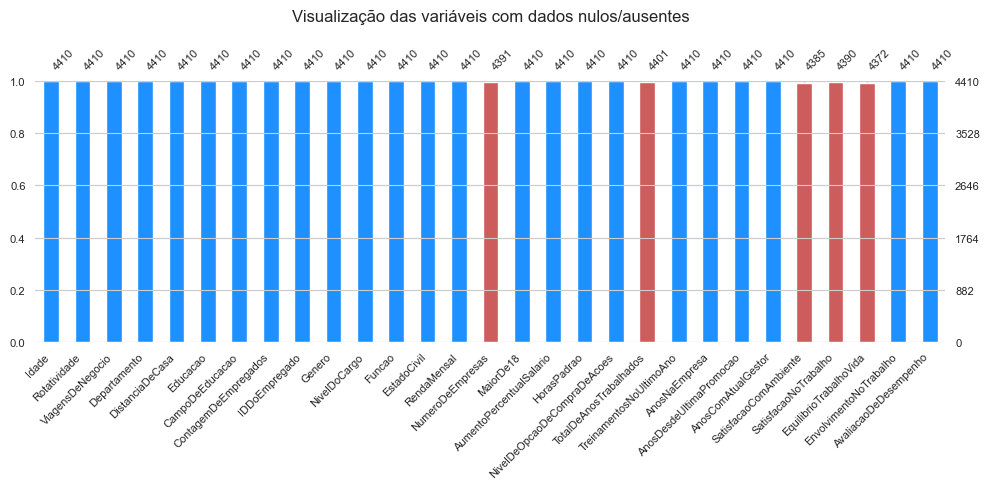

In [13]:
# Exibindo gráfico de valores nulos

fn.grafico_bar_valores_nulos(df_analise)

In [14]:
# Lista das variáveis com valores nulos
lista = [col for col in df_analise.columns if df_analise[col].isnull().any()]

# Preenchendo com a 'moda' as variáveis com valores nulos
for col in lista:
    moda = df_analise[col].mode()[0]
    df_analise.loc[df_analise[col].isnull(), col] = moda

Foram identificadas cinco variáveis categóricas numéricas com registros nulos, que foram preenchidos com os valores da **moda**.

In [15]:
fn.gerar_metadados(df_analise)

,Variável,Tipo,Qtde de nulos,% de nulos,Cardinalidade
0,Idade,int64,0,0.0,43
1,MaiorDe18,object,0,0.0,1
2,EnvolvimentoNoTrabalho,int64,0,0.0,4
3,EquilibrioTrabalhoVida,float64,0,0.0,4
4,SatisfacaoNoTrabalho,float64,0,0.0,4
5,SatisfacaoComAmbiente,float64,0,0.0,4
6,AnosComAtualGestor,int64,0,0.0,18
7,AnosDesdeUltimaPromocao,int64,0,0.0,16
8,AnosNaEmpresa,int64,0,0.0,37
9,TreinamentosNoUltimoAno,int64,0,0.0,7


### 4.2. Análise das medidas estatísticas dos dados

In [16]:
# Estatística descritiva das variáveis numéricas

# Obtém as colunas do dataframe que são numéricas
cols = df_analise.select_dtypes(include='number').columns

# Gera a estatística descritiva e transpõe o resultado
df_analise[cols].describe().T

,count,mean,std,min,25%,50%,75%,max
Idade,4410.0,36.923810,9.133301,18.0,30.00,36.0,43.00,60.0
DistanciaDeCasa,4410.0,9.192517,8.105026,1.0,2.00,7.0,14.00,29.0
Educacao,4410.0,2.912925,1.023933,1.0,2.00,3.0,4.00,5.0
ContagemDeEmpregados,4410.0,1.000000,0.000000,1.0,1.00,1.0,1.00,1.0
IDDoEmpregado,4410.0,2205.500000,1273.201673,1.0,1103.25,2205.5,3307.75,4410.0
NivelDoCargo,4410.0,2.063946,1.106689,1.0,1.00,2.0,3.00,5.0
RendaMensal,4410.0,13005.862585,9413.777712,2018.0,5822.00,9838.0,16760.00,39998.0
NumeroDeEmpresas,4410.0,2.687528,2.495967,0.0,1.00,2.0,4.00,9.0
AumentoPercentualSalario,4410.0,15.209524,3.659108,11.0,12.00,14.0,18.00,25.0
HorasPadrao,4410.0,8.000000,0.000000,8.0,8.00,8.0,8.00,8.0


In [17]:
# Estatística descritiva das variáveis categóricas

# Obtém as colunas do dataframe que são categóricas
cols = df_analise.select_dtypes(include=['object', 'category']).columns

# Gera a estatística descritiva e transpõe o resultado
df_analise[cols].describe().T

,count,unique,top,freq
Rotatividade,4410,2,Nao,3699
ViagensDeNegocio,4410,3,Viagens_Raras,3129
Departamento,4410,3,Pesquisa_e_Desenvolvimento,2883
CampoDeEducacao,4410,6,Ciências da Vida,1818
Genero,4410,2,Masculino,2646
Funcao,4410,9,Executivo de Vendas,978
EstadoCivil,4410,3,Casado(a),2019
MaiorDe18,4410,1,Y,4410


### 4.3. Análise exploratória dos dados

#### 4.3.1. Taxa de rotatividade

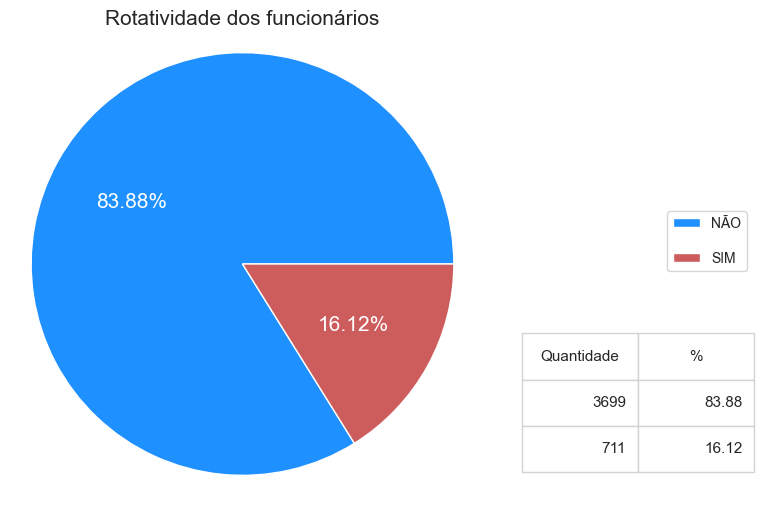

In [46]:
# Calcular as estatísticas no DataFrame para a variável 'Rotatividade'
df_00 = df_analise['Rotatividade'].value_counts()
df_00_perc = df_00 / df_00.sum() * 100
rotatividade = pd.DataFrame({'Qtde': df_00, '%': df_00_perc})

# Criar gráfico de pizza
fig, ax = plt.subplots(figsize=(6, 6))
colors = ['dodgerblue', 'indianred']

# Capturar os textos do gráfico de pizza
wedges, texts, autotexts = ax.pie(
    rotatividade['%'], labels=None, autopct='%0.2f%%', colors=colors, textprops={'fontsize': 15})

# Alterar a cor da fonte dos rótulos de autopreenchimento para branco
for autotext in autotexts:
    autotext.set_color('white')

# Adicionar legendas
legendas = ['NÃO', 'SIM']
ax.legend(legendas, loc='right', labelspacing=1.5,
          bbox_to_anchor=(1.0, 0.1, 0.6, 0.9))

# Adicionar tabela
cell_text = rotatividade.apply(
    lambda x: [f'{int(x["Qtde"]):.0f}', f'{x["%"]:.2f}'], axis=1).tolist()
tabela = plt.table(cellText=cell_text, colLabels=[
                   'Quantidade', '%'], loc='bottom right', bbox=(1.1, 0.05, 0.5, 0.3))
tabela.auto_set_font_size(False)
tabela.set_fontsize(11)

# Alterar a cor da grade da tabela
for key, cell in tabela.get_celld().items():
    cell.set_edgecolor('lightgrey')

# Ajustar layout
plt.axis('equal')

# Adicionar título
plt.title('Rotatividade dos funcionários', fontsize=15)

# Exibindo o gráfico
plt.show()

Observa-se que, dos 4410 funcionários, **711** (aproximadamente **16,12%**) não fazem mais parte do quadro de colaboradores, seja por pedido de demissão ou por desligamento.

#### 4.3.2. Distribuição de idade

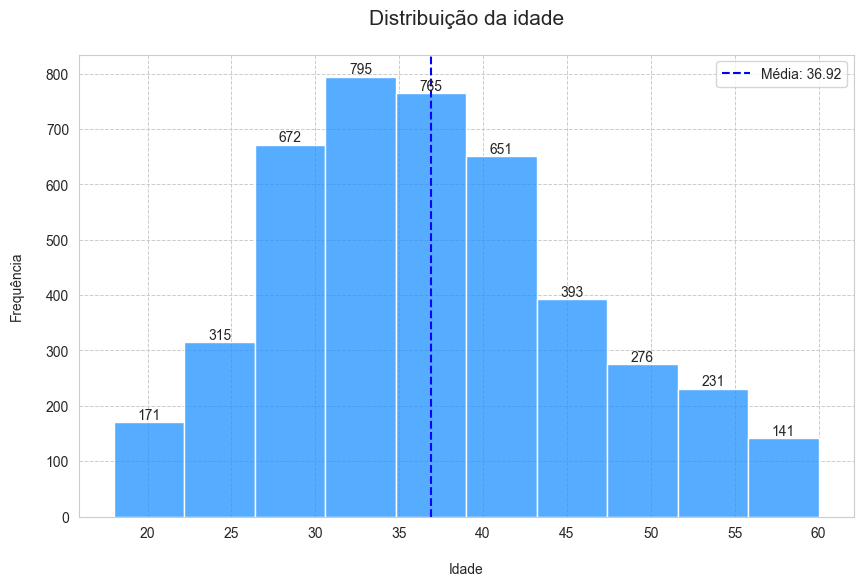

In [19]:
# Criar o gráfico histograma
plt.subplots(figsize=(10, 6))
plot = sns.histplot(data=df_analise, x='Idade', bins=10, kde=False, color='dodgerblue')

# Adicionando frequência sobre as barras
for p in plot.patches:
    plot.annotate(f'{int(p.get_height())}', (
        p.get_x() + p.get_width() / 2., p.get_height()
        ), ha='center', va='bottom', fontsize=10)

# Adicionando linha vertical para a média
idade_media = df_analise['Idade'].mean()
plt.axvline(x=idade_media, color='blue', linestyle='--', label=f'Média: {idade_media:.2f}')

# Adicionando e formatando rótulos e título 
plot.set_title('Distribuição da idade\n', fontsize=15)
plot.set(xlabel='\nIdade', ylabel='Frequência\n')
plot.tick_params(axis='both', labelsize=10)

# Ajustando os rótulos do eixo x de 5 em 5 anos
plt.xticks(range(20, 65, 5))

# Formatando grade do gráfico
plt.grid(True, which='both', linestyle='--', linewidth=0.7)

# Adicionando a legenda
plt.legend()

# Exibindo o gráfico
plt.show()

- A maior concentração de funcionários está na faixa etária de aproximadamente 30 a 43 anos;
- A média de idade é de cerca de **37 anos** _(36,92)_;
- A menor concentração de funcionários está na faixa etária de aproximadamente 55 a 60 anos.

#### 4.3.3. Taxa de rotatividade por faixa etária

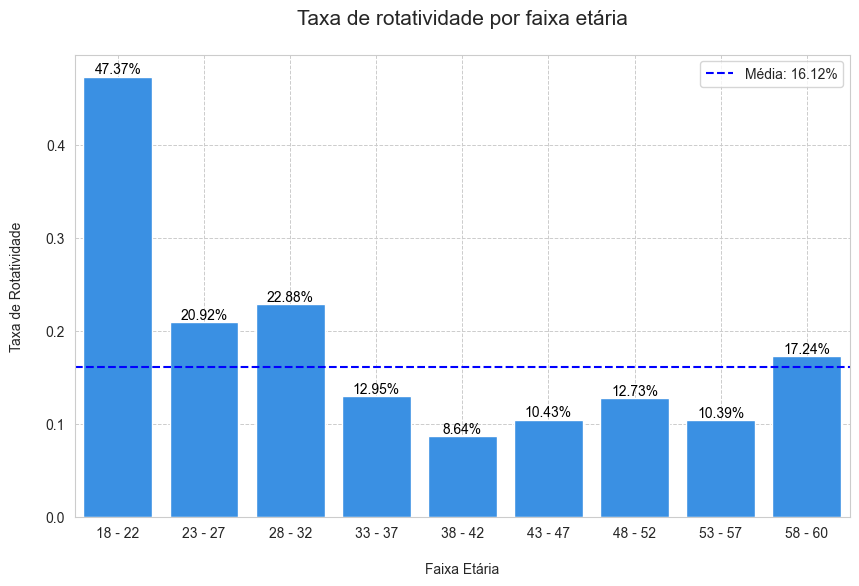

In [102]:
# Converter valores de 'Rotatividade' para binário
df_analise['RotatividadeBin'] = df_analise['Rotatividade'].map(
    {'Sim': 1, 'Nao': 0})

# Definir faixas etárias
faixas_etarias = pd.cut(df_analise['Idade'],
                        bins=range(18, 64, 5), right=False)

# Calcular a taxa de rotatividade por faixa etária
rotatividade_por_faixa = df_analise.groupby(
    faixas_etarias)['RotatividadeBin'].mean()

# Criar o gráfico de barras
plt.figure(figsize=(10, 6))
plot = sns.barplot(x=rotatividade_por_faixa.index,
                   y=rotatividade_por_faixa.values, palette=['dodgerblue'])

# Adicionar rótulos e título
plot.set_title('Taxa de rotatividade por faixa etária\n', fontsize=15)
plot.set(xlabel='\nFaixa Etária', ylabel='Taxa de Rotatividade\n')
plot.tick_params(axis='both', labelsize=10)

# Adicionando linha horizontal para a média
rotatividade_media = df_analise['RotatividadeBin'].mean()
plt.axhline(rotatividade_media, color='blue', linestyle='--',
            label=f'Média: {rotatividade_media:.2%}')

# Adicionar valores sobre as barras
for p in plot.patches:
    plot.annotate(f'{p.get_height():.2%}', (p.get_x() + p.get_width() / 2., p.get_height()),
                  ha='center', va='bottom', fontsize=10, color='black')

# Renomear rótulos do eixo x
faixa_etaria_labels = ['18 - 22', '23 - 27', '28 - 32', '33 - 37',
                       '38 - 42', '43 - 47', '48 - 52', '53 - 57', '58 - 60']
plot.set_xticklabels(faixa_etaria_labels)

# Formatando grade do gráfico
plt.grid(True, which='both', linestyle='--', linewidth=0.7)

# Adicionando a legenda
plt.legend()

# Exibindo o gráfico
plt.show()

- A _taxa média_ de rotatividade é de **16,12%** dos funcionários;
- A faixa etária de **18 a 22 anos** apresenta a maior rotatividade, com aproximadamente **47.37%**;
- A menor rotatividade, de aproximadamente **8,64%**, ocorre na faixa etária de **38 a 42 anos**;
- Considerando a _taxa média_, as faixas etárias de **18 a 32** anos e **58 a 60** anos possuem as maiores taxas de rotatividade;
- A faixa etária de **38 a 42 anos** apresenta a menor rotatividade, considerando a _taxa média_.


#### 4.3.4. Percentual de funcionários por gênero

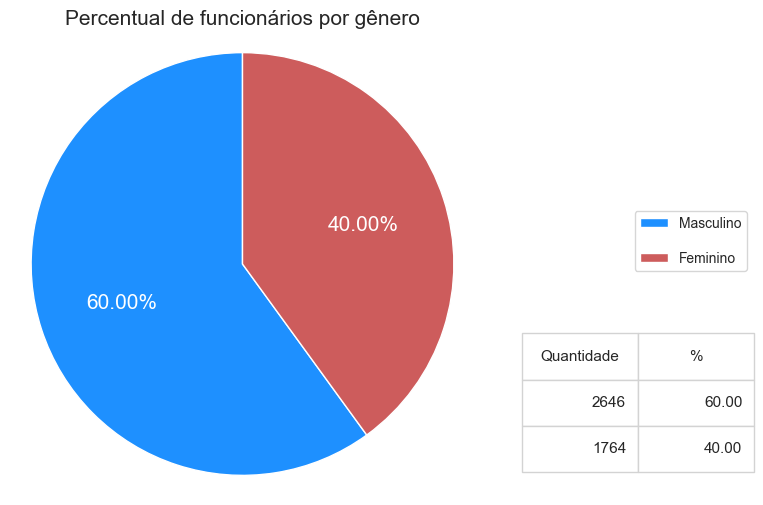

In [45]:
# Calcular as estatísticas no DataFrame para a variável 'Genero'
df_01 = df_analise['Genero'].value_counts()
df_01_perc = df_01 / df_01.sum() * 100
funcionarios_por_genero = pd.DataFrame({'Qtde': df_01, '%': df_01_perc})

# Criar gráfico de pizza
fig, ax = plt.subplots(figsize=(6, 6))
colors = ['dodgerblue', 'indianred']

# Capturar os textos do gráfico de pizza
wedges, texts, autotexts = ax.pie(
    funcionarios_por_genero['%'], labels=None, autopct='%0.2f%%', colors=colors, textprops={'fontsize': 15}, startangle=90)

# Alterar a cor da fonte dos rótulos de autopreenchimento para branco
for autotext in autotexts:
    autotext.set_color('white')

# Adicionar legendas
legendas = ['Masculino', 'Feminino']
ax.legend(legendas, loc='right', labelspacing=1.5,
          bbox_to_anchor=(1.0, 0.1, 0.6, 0.9))

# Adicionar tabela
cell_text = funcionarios_por_genero.apply(
    lambda x: [f'{int(x["Qtde"]):.0f}', f'{x["%"]:.2f}'], axis=1).tolist()
tabela = plt.table(cellText=cell_text, colLabels=[
                   'Quantidade', '%'], loc='bottom right', bbox=(1.1, 0.05, 0.5, 0.3))
tabela.auto_set_font_size(False)
tabela.set_fontsize(11)

# Alterar a cor da grade da tabela
for key, cell in tabela.get_celld().items():
    cell.set_edgecolor('lightgrey')

# Ajustar layout
plt.axis('equal')

# Adicionar título
plt.title('Percentual de funcionários por gênero', fontsize=15)

# Exibindo o gráfico
plt.show()

Observa-se uma predominância de funcionários do _gênero masculino_, representando exatamente **60%**, enquanto as funcionárias do _gênero feminino_ correspondem a **40%**.

#### 4.3.5. Taxa de rotatividade por gênero

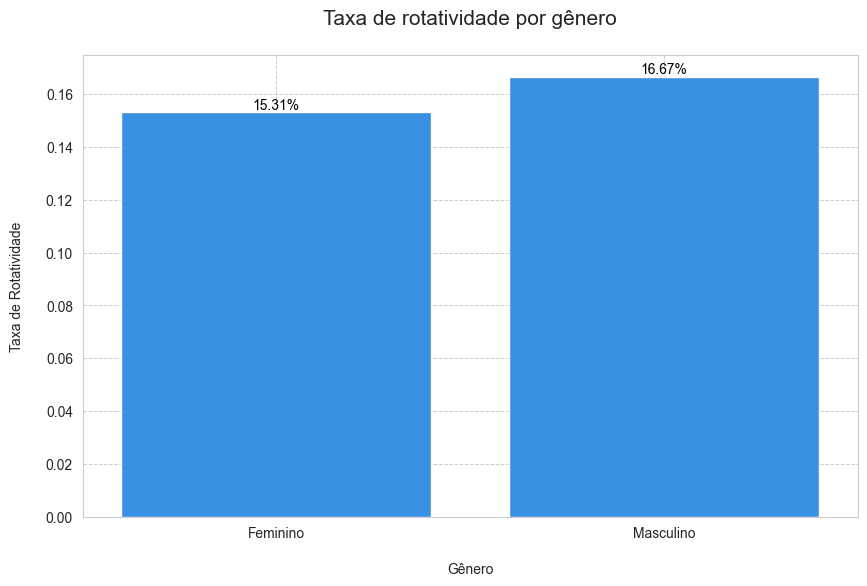

In [43]:
# Calcular a taxa de rotatividade por gênero
rotatividade_por_genero = df_analise.groupby('Genero')['RotatividadeBin'].mean()

# Criar o gráfico de barras
plt.figure(figsize=(10,6))
plot = sns.barplot(x=rotatividade_por_genero.index,
                   y=rotatividade_por_genero.values, palette=['dodgerblue'])

# Adicionar rótulos e título
plot.set_title('Taxa de rotatividade por gênero\n', fontsize=15)
plot.set(xlabel='\nGênero', ylabel='Taxa de Rotatividade\n')
plot.tick_params(axis='both', labelsize=10)

# Adicionar valores sobre as barras
for p in plot.patches:
    plot.annotate(f'{p.get_height():.2%}', (p.get_x() + p.get_width() / 2., p.get_height()),
                  ha='center', va='bottom', fontsize=10, color='black')
    
# Formatando grade do gráfico
plt.grid(True, which='both', linestyle='--', linewidth=0.7)

# Exibindo o gráfico
plt.show()

Apesar de a quantidade de funcionários do gênero masculino ser significativamente maior do que a de funcionárias do gênero feminino, essa diferença não se reflete na taxa de rotatividade por gênero. A taxa de rotatividade é ligeiramente diferente entre os gêneros, com **16,67%** dos colaboradores do _gênero masculino_ e **15,31%** dos colaboradores do _gênero feminino_ não fazendo mais parte da empresa.

#### 4.3.6. Quantidade de funcionários por função

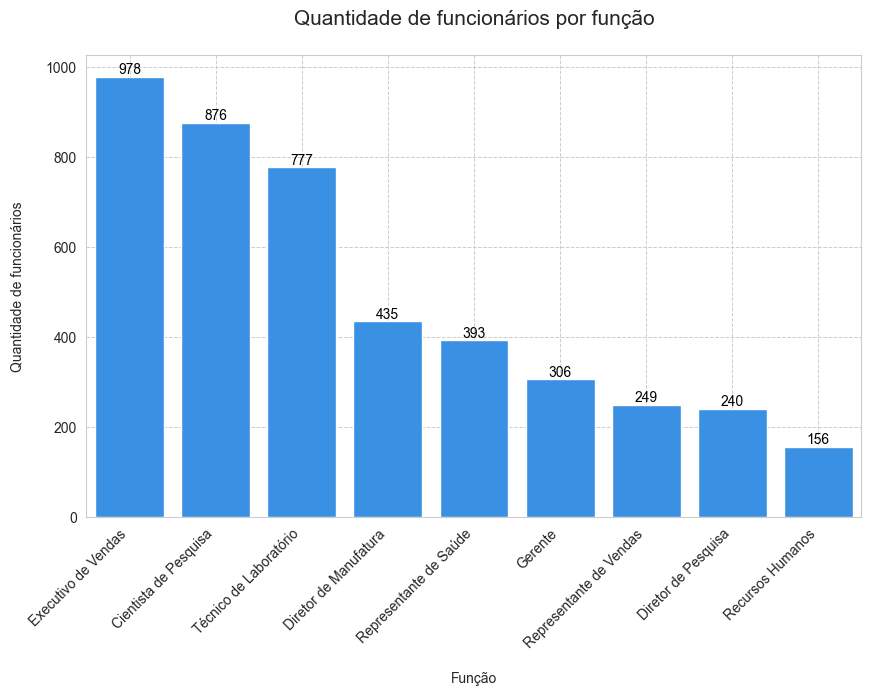

In [95]:
# Calcular a quantidade de funcionários por função
funcionarios_por_funcao = df_analise['Funcao'].value_counts()

# Criar o gráfico de barras
plt.figure(figsize=(10, 6))
plot = sns.barplot(x=funcionarios_por_funcao.index,
                   y=funcionarios_por_funcao.values, palette=['dodgerblue'])

# Adicionar rótulos e título
plot.set_title('Quantidade de funcionários por função\n', fontsize=15)
plot.set(xlabel='\nFunção', ylabel='Quantidade de funcionários\n')
plot.tick_params(axis='both', labelsize=10)

# Rotacionando os valores do eixo x
plt.xticks(rotation=45, ha='right') 

# Adicionar valores sobre as barras
for p in plot.patches:
    plot.annotate(f'{p.get_height():.0f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                  ha='center', va='bottom', fontsize=10, color='black')

# Formatando grade do gráfico
plt.grid(True, which='both', linestyle='--', linewidth=0.7)

# Exibindo o gráfico
plt.show()

As funções de **Executivo de Vendas**, **Cientista de Pesquisa** e **Técnico de Laboratório** concentram mais da metade do total de funcionários, aproximadamente 60% do quadro de colaboradores.

#### 4.3.7. Taxa de rotatividade por função

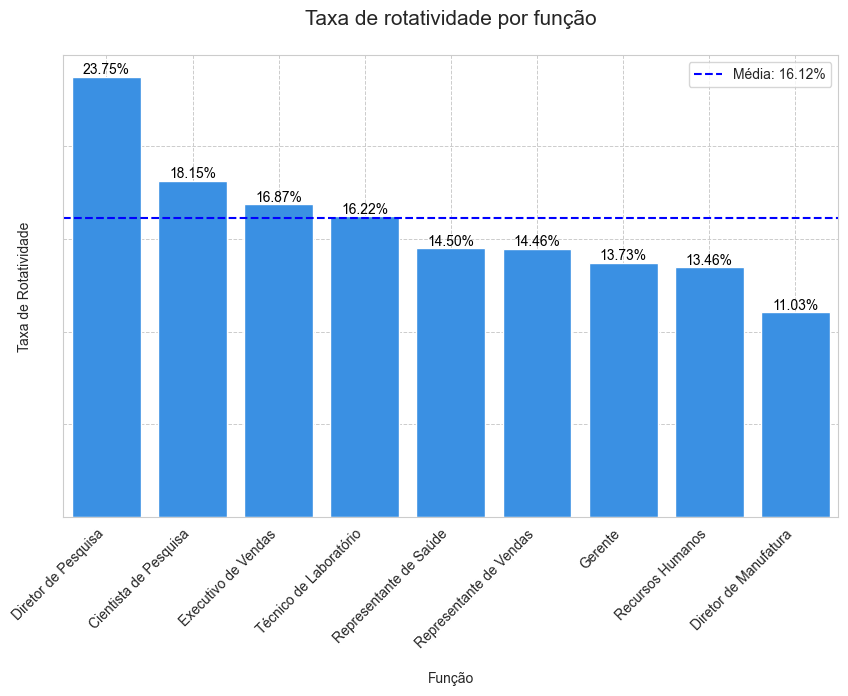

In [103]:
# Calcular a taxa de rotatividade por funcao
rotatividade_por_funcao = df_analise.groupby(
    'Funcao')['RotatividadeBin'].mean()
rotatividade_por_funcao = rotatividade_por_funcao.sort_values(ascending=False)

# Criar o gráfico de barras
plt.figure(figsize=(10, 6))
plot = sns.barplot(x=rotatividade_por_funcao.index,
                   y=rotatividade_por_funcao.values, palette=['dodgerblue'])

# Adicionar rótulos e título
plot.set_title('Taxa de rotatividade por função\n', fontsize=15)
plot.set(xlabel='\nFunção', ylabel='Taxa de Rotatividade\n')
plot.tick_params(axis='both', labelsize=10)

# Adicionando linha horizontal para a média
rotatividade_media = df_analise['RotatividadeBin'].mean()
plt.axhline(rotatividade_media, color='blue', linestyle='--',
            label=f'Média: {rotatividade_media:.2%}')

# Removendo os valores do eixo y
plot.set_yticklabels([])

# Rotacionando os valores do eixo x
plt.xticks(rotation=45, ha='right')

# Adicionar valores sobre as barras
for p in plot.patches:
    plot.annotate(f'{p.get_height():.2%}', (p.get_x() + p.get_width() / 2., p.get_height()),
                  ha='center', va='bottom', fontsize=10, color='black')

# Formatando grade do gráfico
plt.grid(True, which='both', linestyle='--', linewidth=0.7)

# Adicionando a legenda
plt.legend()

# Exibindo o gráfico
plt.show()

Considerando a média de rotatividade de _16,12%_, o cargo com a maior rotatividade é o de **Diretor de Pesquisa**, enquanto o de menor rotatividade é o de **Diretor de Manufatura**. Outras funções que excedem a média incluem **Cientista de Pesquisa**, **Executivo de Vendas** e **Técnico de Laboratório**, sendo este último muito próximo da média.

#### 4.3.8. Distribuição de renda mensal

#### 4.3.9. Taxa de rotatividade por faixa de renda mensal

Questões Adicionais:

    Impacto da Distância de Casa na Rotatividade:
        Existe alguma correlação entre a distância da casa dos funcionários até a empresa e a taxa de rotatividade?

    Influência do Nível de Educação na Rotatividade:
        Como o nível de educação afeta a taxa de rotatividade?

    Relação entre Anos na Empresa e Rotatividade:
        Qual é a relação entre os anos que um funcionário passa na empresa e sua probabilidade de sair?

    Efeito dos Treinamentos no Último Ano sobre a Rotatividade:
        Funcionários que participaram de mais treinamentos no último ano têm menor taxa de rotatividade?

    Impacto do Equilíbrio Trabalho-Vida na Rotatividade:
        Como a satisfação com o equilíbrio entre trabalho e vida pessoal influencia a rotatividade?

    Envolvimento no Trabalho e Rotatividade:
        Qual é a relação entre o nível de envolvimento no trabalho dos funcionários e sua propensão a deixar a empresa?

    Avaliação de Desempenho e Rotatividade:
        Funcionários com avaliações de desempenho mais altas têm menor probabilidade de sair?

    Influência do Aumento Percentual do Salário na Rotatividade:
        Aumentos salariais percentuais têm impacto na taxa de rotatividade dos funcionários?

    Análise de Satisfação no Trabalho e Rotatividade:
        Como a satisfação no trabalho afeta a rotatividade dos funcionários?